In [1]:
import math
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

mp_drawing = mp.solutions.drawing_utils

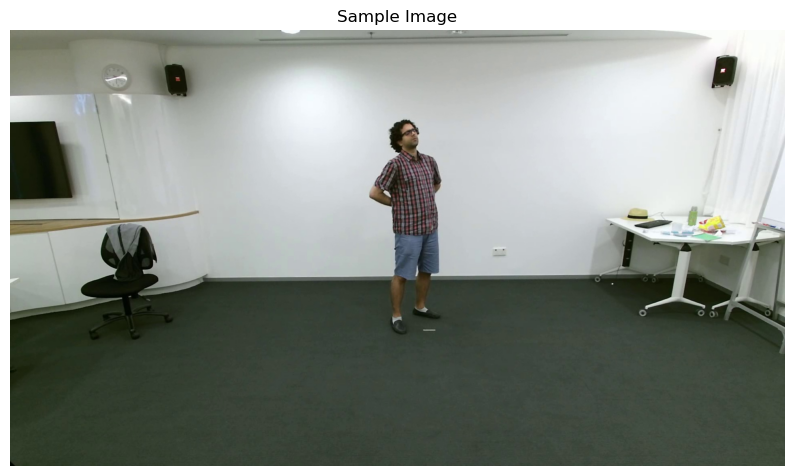

In [3]:
import cv2
import matplotlib.pyplot as plt
sampleImage = cv2.imread(r"Classify\train\backpain\backpain_S001C001P007R002A046_rgb_frame_2.jpg")
plt.figure(figsize=[10, 10])
plt.title('Sample Image')
plt.axis('off')
plt.imshow(sampleImage[:, :, ::-1])
plt.show()

In [4]:
results = pose.process(cv2.cvtColor(sampleImage,cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    for i in range(24):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.522059321
y: 0.240549922
z: -0.180665299
visibility: 0.997867107

LEFT_EYE_INNER:
x: 0.520049214
y: 0.233203962
z: -0.16975008
visibility: 0.996484637

LEFT_EYE:
x: 0.52115494
y: 0.232678115
z: -0.169902563
visibility: 0.995595634

LEFT_EYE_OUTER:
x: 0.522287607
y: 0.232266486
z: -0.169836685
visibility: 0.996970534

RIGHT_EYE_INNER:
x: 0.516199291
y: 0.235731453
z: -0.179706916
visibility: 0.998228

RIGHT_EYE:
x: 0.514717758
y: 0.237136111
z: -0.179926172
visibility: 0.998600185

RIGHT_EYE_OUTER:
x: 0.512438953
y: 0.238919288
z: -0.180070341
visibility: 0.999104679

LEFT_EAR:
x: 0.52012223
y: 0.239184633
z: -0.0983302444
visibility: 0.997592509

RIGHT_EAR:
x: 0.506104052
y: 0.24941799
z: -0.144166768
visibility: 0.99829942

MOUTH_LEFT:
x: 0.524857402
y: 0.249339372
z: -0.150523841
visibility: 0.997025788

MOUTH_RIGHT:
x: 0.519497573
y: 0.254138291
z: -0.164753571
visibility: 0.99768126

LEFT_SHOULDER:
x: 0.539582253
y: 0.30105412
z: -0.0145011386
visibility: 0.999269426

RI

C:\Users\faisa\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


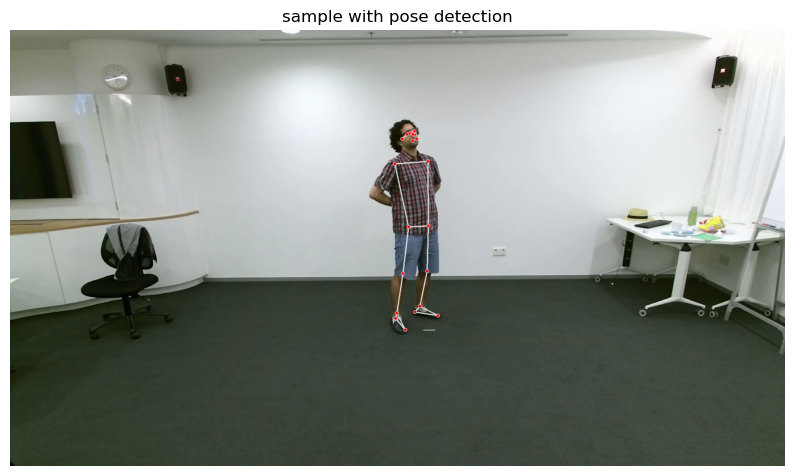

In [5]:
sampleCopy = sampleImage.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=sampleCopy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize=[10,10])
    plt.title('sample with pose detection')
    plt.axis('off')
    plt.imshow(sampleCopy[:,:,::-1])
    plt.show()

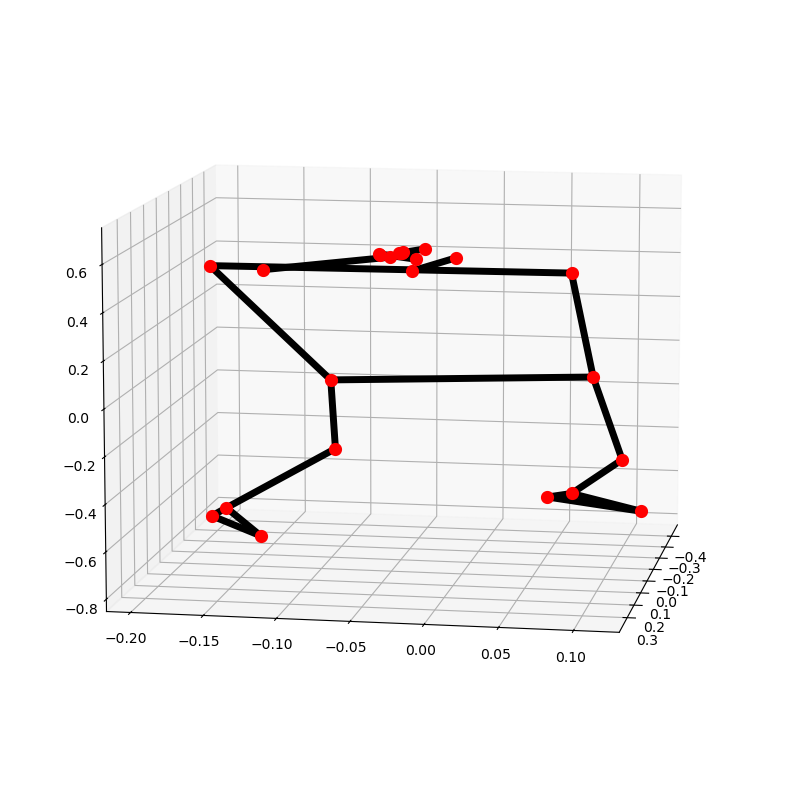

In [6]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [48]:
def detectPose(image, pose, display=True):
    outputImage = image.copy()
    ImageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(ImageRGB)

    height,width,_ = ImageRGB.shape
    landmarks = []

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=outputImage, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
                landmarks.append((int(landmark.x*width), int(landmark.y*height), int(landmark.z*width)))
                
    if display:
        plt.figure(figsize=[20,20])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title('sample image')
        plt.axis('off')
        plt.figure(figsize=[20,20])
        plt.subplot(122)
        plt.imshow(outputImage[:,:,::-1])
        plt.title('sample image with pose detection')
        plt.axis('off')
        
        mp_drawing.plot_landmarks(results.pose_world_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    else:
        return outputImage,landmarks


In [14]:
import warnings

warnings.filterwarnings("ignore")

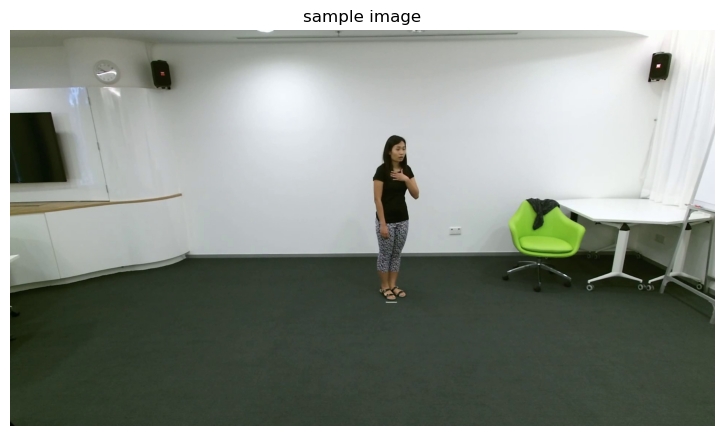

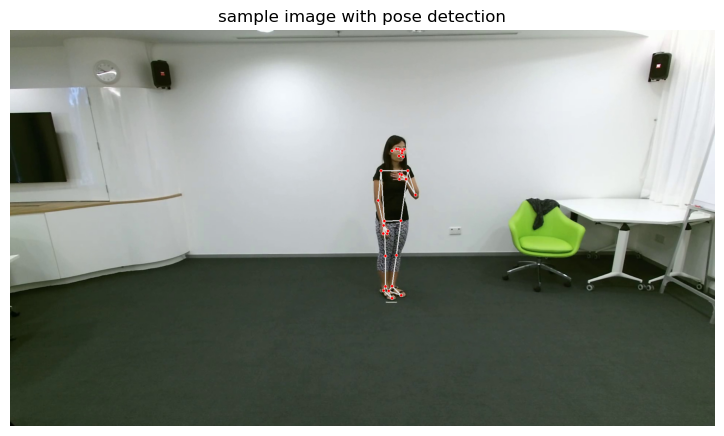

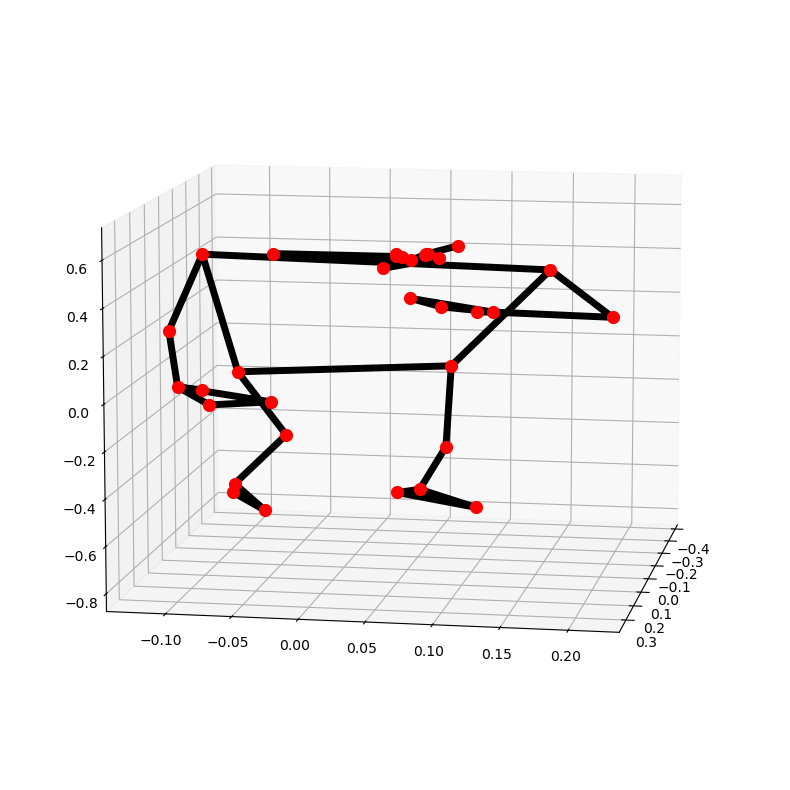

In [51]:
image = cv2.imread(r"Classify\train\chestpain\chestpain_S001C001P001R002A045_rgb_frame_2.jpg")
detectPose(image, pose, display=True)

In [62]:
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=2)
video = cv2.VideoCapture(0)
cv2.namedWindow('pose detection', cv2.WINDOW_NORMAL)
time1 = 0

while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break
    frame = cv2.flip(frame,1)
    
    frame_height,frame_width,_ = frame.shape
    frame = cv2.resize(frame, (int(frame_width*(640/frame_height)),640))
    
    frame,_ = detectPose(frame, pose_video, display=False)
    time2 = time()
    if(time2-time1) > 0:
        frames_per_second = 1.0 / (time2-time1)
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 3)
        
    time1=time2
    
    cv2.imshow('pose detection', frame)
    
    k = cv2.waitKey(1)&0xFF
    if (k == 27):
        break 
video.release()
cv2.destroyAllWindows()   


# Testing and training a live video classifier based on medical conditions 

# save landmarks into CSV with labels

In [4]:
import os
import cv2
import mediapipe as mp
import pandas as pd

# Initialize Mediapipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Function to extract pose landmarks
def extract_pose_landmarks(image_path, label):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image {image_path}")
        return None
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.extend([landmark.x, landmark.y, landmark.z])
        return [label] + landmarks
    return None

data_dir = 'Classify'
output_file = 'pose_landmarks.csv'

# Save to CSV
data = []
for split in ['train', 'test']:
    split_dir = os.path.join(data_dir, split)
    for label in os.listdir(split_dir):
        label_dir = os.path.join(split_dir, label)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                if file_name.endswith(('.jpg', '.png')):  
                    file_path = os.path.join(label_dir, file_name)
                    landmarks = extract_pose_landmarks(file_path, label)
                    if landmarks:
                        data.append(landmarks)

num_landmarks = 33
columns = ['label'] + [f'x{i}' for i in range(num_landmarks)] + \
          [f'y{i}' for i in range(num_landmarks)] + \
          [f'z{i}' for i in range(num_landmarks)]
df = pd.DataFrame(data, columns=columns)
df.to_csv(output_file, index=False)


# Voting System Model

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
df = pd.read_csv('pose_landmarks.csv')

X = df.drop('label', axis=1).values
y = df['label'].values

le = LabelEncoder()
y = le.fit_transform(y)

joblib.dump(le, 'label_encoder.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', clf1), 
    ('svc', clf2), 
    ('knn', clf3)], 
    voting='soft')

voting_clf.fit(X_train, y_train)


joblib.dump(voting_clf, 'voting_classifier_model.pkl')


['voting_classifier_model.pkl']

In [25]:
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy * 100:.2f}%')

report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

Voting Classifier Accuracy: 74.03%
              precision    recall  f1-score   support

Falling_down       0.98      0.96      0.97        91
    backpain       0.85      0.67      0.75       166
   chestpain       0.78      0.69      0.73       150
       cough       0.65      0.51      0.57       125
    headache       0.68      0.77      0.72       124
    neckpain       0.75      0.62      0.68       134
      normal       0.64      0.99      0.78       161

    accuracy                           0.74       951
   macro avg       0.76      0.74      0.74       951
weighted avg       0.75      0.74      0.74       951



# Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, 'randomforest_model.pkl')


['randomforest_model.pkl']

In [27]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'RandomForest Classifier Accuracy: {accuracy * 100:.2f}%')
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

RandomForest Classifier Accuracy: 82.02%
              precision    recall  f1-score   support

Falling_down       0.97      0.91      0.94        91
    backpain       0.86      0.74      0.80       166
   chestpain       0.85      0.80      0.82       150
       cough       0.82      0.66      0.73       125
    headache       0.83      0.85      0.84       124
    neckpain       0.84      0.78      0.81       134
      normal       0.71      1.00      0.83       161

    accuracy                           0.82       951
   macro avg       0.84      0.82      0.82       951
weighted avg       0.83      0.82      0.82       951



# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, 'logistic_regression_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [29]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Classifier Accuracy: {accuracy * 100:.2f}%')
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

Logistic Regression Classifier Accuracy: 62.04%
              precision    recall  f1-score   support

Falling_down       0.80      0.81      0.81        91
    backpain       0.78      0.55      0.65       166
   chestpain       0.60      0.53      0.57       150
       cough       0.42      0.39      0.41       125
    headache       0.56      0.65      0.60       124
    neckpain       0.67      0.45      0.54       134
      normal       0.60      0.96      0.74       161

    accuracy                           0.62       951
   macro avg       0.63      0.62      0.61       951
weighted avg       0.63      0.62      0.61       951



# KNN Model

In [30]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

joblib.dump(clf, 'knn_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [31]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Classifier Accuracy: {accuracy * 100:.2f}%')
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

Logistic Regression Classifier Accuracy: 62.78%
              precision    recall  f1-score   support

Falling_down       0.98      0.89      0.93        91
    backpain       0.71      0.62      0.66       166
   chestpain       0.65      0.58      0.61       150
       cough       0.45      0.47      0.46       125
    headache       0.53      0.58      0.55       124
    neckpain       0.62      0.40      0.49       134
      normal       0.60      0.88      0.71       161

    accuracy                           0.63       951
   macro avg       0.65      0.63      0.63       951
weighted avg       0.64      0.63      0.62       951



# Now lets try Deep Learning

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import pickle

# Load the CSV file
csv_file = r'pose_landmarks.csv'   # Replace with your actual file path
df = pd.read_csv(csv_file)

# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Normalize the features
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Save the class names for later use
with open('class_names.pkl', 'wb') as f:
    pickle.dump(class_names, f)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Define the model
model = Sequential([
    Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dropout(0.1),
    Dense(len(label_encoder.classes_), activation='softmax')
])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Callbacks for early stopping, learning rate reduction, and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
# Function for learning rate scheduling
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))
lr_schedule = LearningRateScheduler(lr_scheduler)

In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr, lr_schedule])
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1472 - loss: 3.4515 - val_accuracy: 0.2378 - val_loss: 2.2105 - learning_rate: 0.0010
Epoch 2/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2449 - loss: 2.1190 - val_accuracy: 0.2024 - val_loss: 1.9393 - learning_rate: 0.0010
Epoch 3/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2445 - loss: 1.9187 - val_accuracy: 0.2418 - val_loss: 1.8396 - learning_rate: 0.0010
Epoch 4/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2698 - loss: 1.8490 - val_accuracy: 0.2654 - val_loss: 1.7812 - learning_rate: 0.0010
Epoch 5/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2732 - loss: 1.8036 - val_accuracy: 0.2746 - val_loss: 1.7628 - learning_rate: 0.0010
Epoch 6/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2799 - loss: 1.7665 - val_accuracy: 0.2733 - val_loss: 1.7588 - learning_rate: 0.0010
Epoch 7/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2835 - loss: 1.7525 - val_acc

In [9]:
model.save('DeepModel.keras')

In [6]:
import cv2
import mediapipe as mp
import numpy as np
import joblib

clf = joblib.load('DeepModel.keras')
le = joblib.load('class_names.pkl')

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

def extract_landmarks_from_frame(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.extend([landmark.x, landmark.y, landmark.z])
        return landmarks, results.pose_landmarks
    return None, None

video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Error: Could not access the webcam.")
    exit()

while True:
    ok, frame = video.read()
    if not ok:
        print("Error: Could not read frame from the webcam.")
        break
    
    frame = cv2.flip(frame, 1)
    landmarks, pose_landmarks = extract_landmarks_from_frame(frame)
    
    if landmarks:
        landmarks = np.array(landmarks).reshape(1, -1)
        prediction = clf.predict(landmarks)
        label = le.inverse_transform(prediction)[0]
        
        mp_drawing.draw_landmarks(frame, pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    cv2.imshow('Pose Detection', frame)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  
        break

video.release()
cv2.destroyAllWindows()

UnpicklingError: persistent IDs in protocol 0 must be ASCII strings

In [1]:
!streamlit run app_2.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app_2.py


# Run Live Video Classification

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import joblib

clf = joblib.load('logistic_regression_model.pkl')
le = joblib.load('label_encoder.pkl')

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

def extract_landmarks_from_frame(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.extend([landmark.x, landmark.y, landmark.z])
        return landmarks, results.pose_landmarks
    return None, None

video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Error: Could not access the webcam.")
    exit()

while True:
    ok, frame = video.read()
    if not ok:
        print("Error: Could not read frame from the webcam.")
        break
    
    frame = cv2.flip(frame, 1)
    landmarks, pose_landmarks = extract_landmarks_from_frame(frame)
    
    if landmarks:
        landmarks = np.array(landmarks).reshape(1, -1)
        prediction = clf.predict(landmarks)
        label = le.inverse_transform(prediction)[0]
        
        mp_drawing.draw_landmarks(frame, pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    cv2.imshow('Pose Detection', frame)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  
        break

video.release()
cv2.destroyAllWindows()

In [ ]:
!streamlit run app_v2.py

## Run Live video classification

In [1]:
import cv2
import mediapipe as mp
import joblib
import numpy as np

model = joblib.load('logistic_regression_model.pkl')
le = joblib.load('label_encoder.pkl')

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

def extract_landmarks_from_frame(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.extend([landmark.x, landmark.y, landmark.z])
        return landmarks, results.pose_landmarks
    return None, None

video = cv2.VideoCapture(1)
cv2.namedWindow('Cough Detection', cv2.WINDOW_NORMAL)

while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break
    
    frame = cv2.flip(frame, 1)
    landmarks, pose_landmarks = extract_landmarks_from_frame(frame)
    
    if landmarks:
        landmarks = np.array(landmarks).reshape(1, -1)
        prediction = model.predict(landmarks)
        label = le.inverse_transform(prediction)[0]
        
        mp_drawing.draw_landmarks(frame, pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    cv2.imshow('Cough Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break

video.release()
cv2.destroyAllWindows()


C:\Users\faisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\faisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\faisa

In [1]:
!streamlit run app_v21.py

: 